<a href="https://colab.research.google.com/github/Natural-Language-Processing-YU/Exercises/blob/main/M5_Example_Word2Vec_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Word2Vec on Shakespeare Corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


Words similar to 'king': [('believe', 0.9797132611274719), ('queen', 0.9770581722259521), ('way', 0.9767734408378601), ('Cassio', 0.9764009714126587), ('Look', 0.9759466052055359), ('Romeo', 0.9754884243011475), ('sweet', 0.973822295665741), ('done', 0.973445475101471), ('mean', 0.9716184139251709), ('glad', 0.9688976407051086)]
Vector representation of 'queen': [-5.07920459e-02  2.19415665e-01  2.76766300e-01  2.59508133e-01
  9.73503143e-02 -7.63959065e-02  4.04988453e-02  5.52803636e-01
 -1.40151203e-01  2.94641815e-02  1.13000102e-01 -3.33454609e-02
 -2.96367228e-01  9.08562243e-02  2.13163123e-01 -4.60558124e-02
  1.60180032e-01  1.74833592e-02 -1.65565908e-01 -2.36066759e-01
 -6.54324815e-02  3.59952241e-01  3.42857599e-01 -4.43919841e-03
  1.22831285e-01 -2.30051037e-02  1.74020026e-02  1.18783310e-01
 -1.20447494e-01  3.82763863e-01  1.49482295e-01 -4.49671745e-01
  4.37738180e-01 -3.46581608e-01  1.07465439e-01  1.50961116e-01
  2.26466745e-01 -2.45542899e-01  4.20312643e-01 -

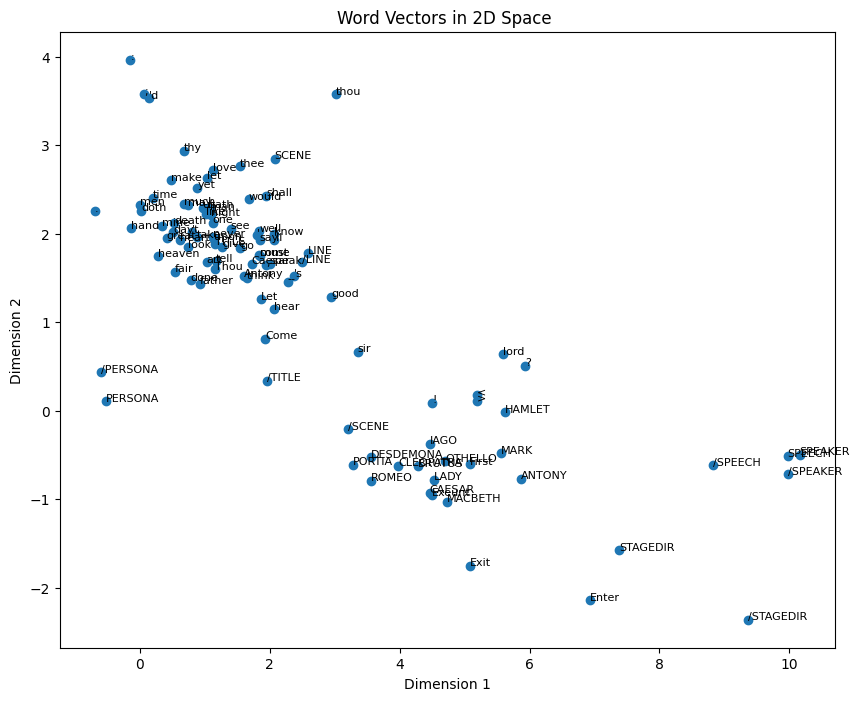

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import PCA

# Download stopwords and Punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') #lemmatization


# Load the text corpus (example: Shakespeare plays)
nltk.download('shakespeare')

from nltk.corpus import shakespeare

# Combine all the text from the Shakespeare plays
corpus = ' '.join([shakespeare.raw(fileid) for fileid in shakespeare.fileids()])

# Tokenize the text into sentences using the Punkt tokenizer
sentences = sent_tokenize(corpus)

# Tokenize the sentences into words using the Punkt tokenizer
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Remove stopwords from the tokenized sentences
stop_words = set(stopwords.words('english'))
filtered_sentences = [[word for word in sentence if word.lower() not in stop_words] for sentence in tokenized_sentences]

# Lemmatize the filtered sentences
lemmatizer = WordNetLemmatizer()
lemmatized_sentences = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in filtered_sentences]

# Train the Word2Vec model
model = Word2Vec(sentences=filtered_sentences, vector_size=100, window=5, min_count=5, workers=4)

# Example usage of the trained Word2Vec model
similar_words = model.wv.most_similar('king')
print("Words similar to 'king':", similar_words)

# Get the word vector for a specific word
word_vector = model.wv['queen']
print("Vector representation of 'queen':", word_vector)

# Reduce the dimensionality of word vectors to 2 dimensions using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(model.wv[model.wv.key_to_index])


plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:100, 0], vectors_2d[:100, 1])
words = list(model.wv.index_to_key)[:100]
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8)
plt.title("Word Vectors in 2D Space ")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()